### Data Collection

In [3]:
import os

In [5]:
# Reading textfiles for captions

def readTextFile(path):
    with open(path,encoding='utf-8') as file:
        caption = file.read()
        
    return caption

In [7]:
Captions = readTextFile("../Flickr8k.token.txt")
Captions = Captions.split('\n')[:-1]
print(f'Taotal Captions: {len(Captions)}')
print(f'Total Images: {int(len(Captions)/5)}')
Captions[:10]

Taotal Captions: 40460
Total Images: 8092


['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

From the above Observations we can conclude that,
- There are total `8092` Images.
- Each Iamge Contains `5` different Captions.

In [9]:
#Create a Caption Dictionary

Caption_dict = {}

for caption in Captions:
    image,img_caption = caption.split('\t')
    image = image.split('#')[0]
    if image not in list(Caption_dict.keys()):
        Caption_dict[image] = []
        
    Caption_dict[image].append(img_caption)

In [10]:
Caption_dict['1000268201_693b08cb0e.jpg']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

### Plot Some Image

In [17]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

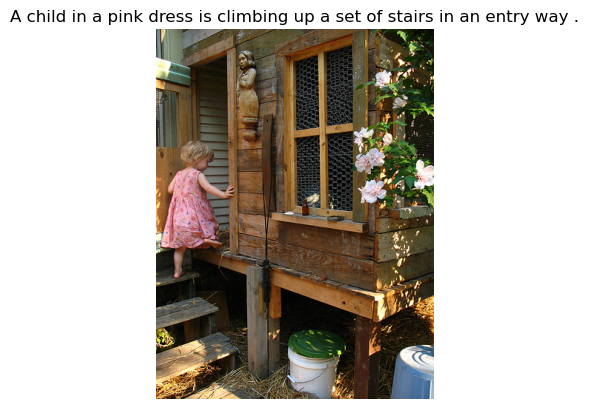

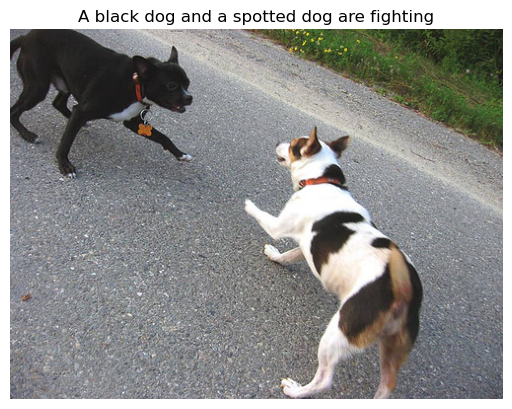

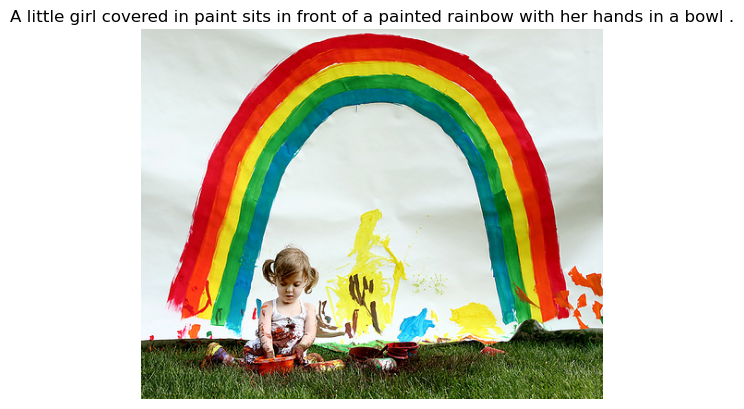

In [33]:
images_path = '../images/Images/'

for i in range(3):
    img = list(Caption_dict.keys())[i]
    caption = Caption_dict[img][0]
    img = cv2.imread(os.path.join(images_path,img))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

### Data Cleaning

In [35]:
import pickle
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[a-z]+") #it will filter out numbers & special characters

In [37]:
#process captions to remove irrelevant words

def dataclean(sentence):
    
    sentence = sentence.lower()
    tokens = tokenizer.tokenize(sentence)
    
    sentence = ' '.join(word for word in tokens if len(word) > 1)
    return sentence

In [39]:
for key,caption_list in Caption_dict.items():
    for i in range(len(caption_list)):
        caption_list[i] = dataclean(caption_list[i])
        
Caption_dict['1000268201_693b08cb0e.jpg']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [41]:
#dumping Caption_dict for better use 

with open('Caption_description.pkl','wb') as f:
    pickle.dump(Caption_dict,f)